# MNIST 데이터셋 학습 (to do)
MNIST 데이터셋은0~9까지 총 10개의 label로 이루어진 이미지 분류를 위한 사이즈의 손글씨 데이터셋이다.  
각각의 레이블마다 28×28 크기 이미지인 60,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 70,000개의 28×28 크기의 이미지로 데이터셋이 구성되어 있다.

In [1]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## (1) 데이터셋

In [2]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(60000, 28, 28, 1) (60000, 10)


In [4]:
#데이터 증강 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180) 회전
        zoom_range = 0.1, # Randomly zoom image 확대 축소
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width) 수평 이동
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height) 수직 이동
        horizontal_flip=False,  # randomly flip images 수평 반전
        vertical_flip=False)  # randomly flip images 수직 반전 


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, Y_train, batch_size=128)
test_gen = datagen.flow(X_test, Y_test, batch_size=128)

## (2) 모델링

2022-12-12 18:53:07.248270: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 18:53:07.718096: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21957 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:b3:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

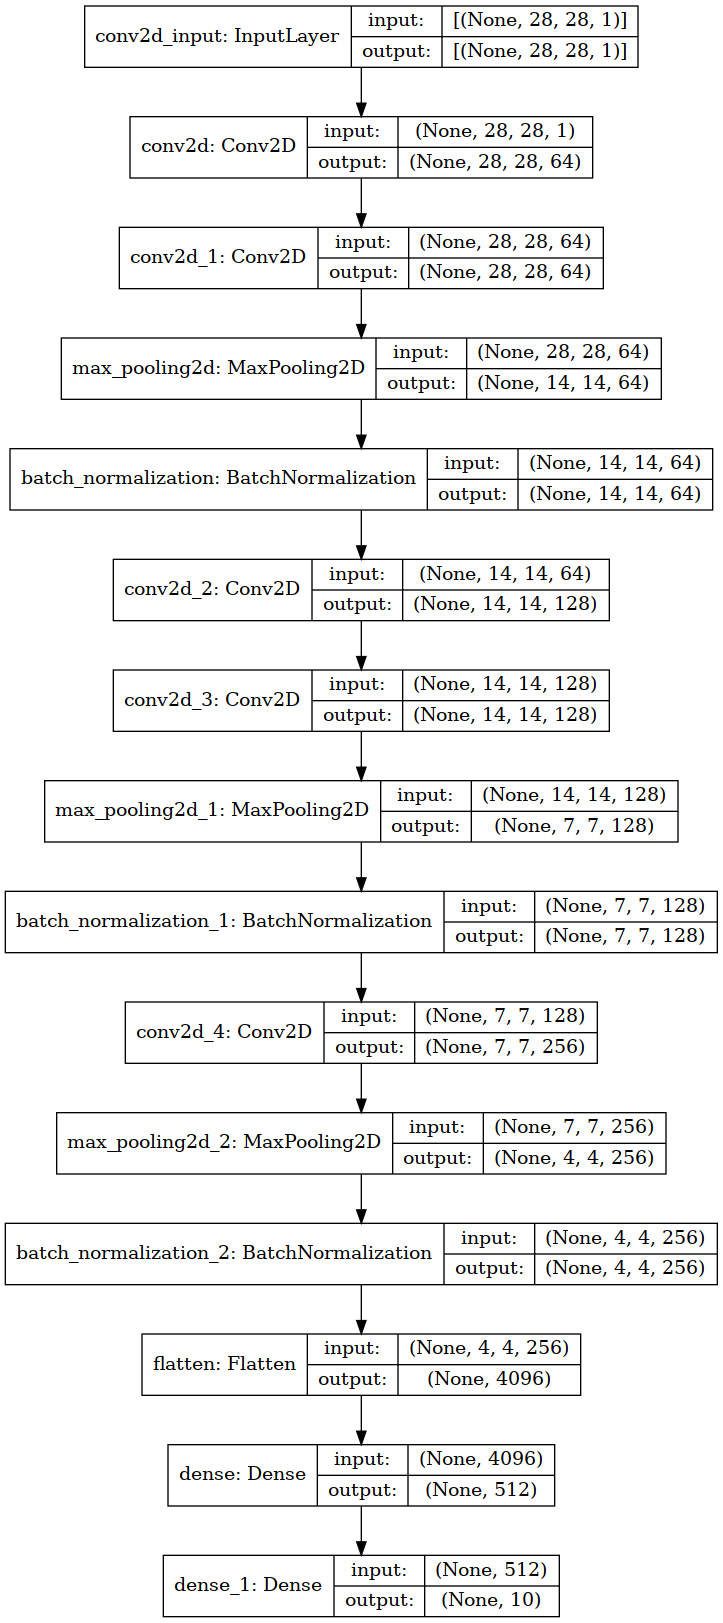

In [5]:
def CNN(n_in, n_out):
    
    model = Sequential()    
    model.add(Conv2D(filters=64, kernel_size = (3,3), padding="same",activation="relu", input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size = (3,3), padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=128, padding="same",kernel_size = (3,3), activation="relu"))
    model.add(Conv2D(filters=128,padding="same", kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    model.add(BatchNormalization())  
 

    model.add(Conv2D(filters=256, kernel_size = (3,3), padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    
    return model

model=CNN(n_in, n_out)
model.summary()

from tensorflow.keras.utils import plot_model
%matplotlib inline
plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정

In [6]:
#Optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001)

#Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

/home/piai/다운로드/yes/envs/mldl/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [7]:
import keras
batch_size = 128
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size
#학습 양상을 보고 학습을 조기에 종료(overfitting방지)
early = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", 
        patience=10, #참는 정지
        verbose=1,
        mode="max", # 최대정확도.
        restore_best_weights=True,  
     )
#ReduceLROnPlateau:측정 항목이 향상되지 않는 경우 학습 속도를 줄임
reduce = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

## (4) 모델 학습시키기

In [8]:
# Fit the model
history = model.fit_generator(train_gen, 
                              epochs = 40, 
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps, 
                              callbacks=[early, reduce])

/home/piai/다운로드/yes/envs/mldl/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-12 18:53:08.823949: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-12-12 18:53:10.095683: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-12-12 18:53:11.187878: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-12 18:53:11.188449: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-12 18:53:11.188467: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-12-12 18:53:11.188981: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-12 18:53:11.189024: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-12-12 18:53:12.137594: I tensorflow/stream_executor/cuda/c

468/468 [==============================] - 24s 43ms/step - loss: 0.1766 - accuracy: 0.9499 - val_loss: 0.3084 - val_accuracy: 0.9239
Epoch 2/40
468/468 [==============================] - 20s 43ms/step - loss: 0.0569 - accuracy: 0.9823 - val_loss: 0.1101 - val_accuracy: 0.9673
Epoch 3/40
468/468 [==============================] - 19s 41ms/step - loss: 0.0501 - accuracy: 0.9851 - val_loss: 0.0513 - val_accuracy: 0.9837
Epoch 4/40
468/468 [==============================] - 19s 42ms/step - loss: 0.0395 - accuracy: 0.9882 - val_loss: 0.0415 - val_accuracy: 0.9858
Epoch 5/40
468/468 [==============================] - 19s 42ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0330 - val_accuracy: 0.9902
Epoch 6/40
468/468 [==============================] - 19s 40ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 7/40
468/468 [==============================] - 15s 32ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0300 - val_accuracy: 0.9908
Epo

## (5) 모델 평가하기

In [9]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 1s 7ms/step - loss: 0.0114 - accuracy: 0.9962
loss : 0.0114, accruracy : 0.9962


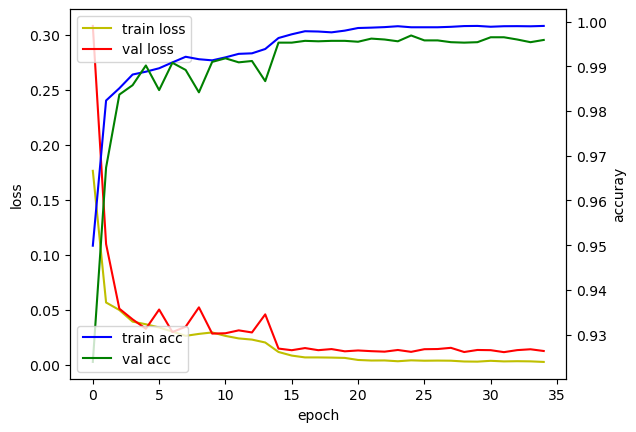

In [10]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## (6) 모델 사용하기

모델 평가 후, 분류 오류가 난 사례들을 확인해보고, 모델과 데이터셋에 대한 평가 및 분석해볼 것

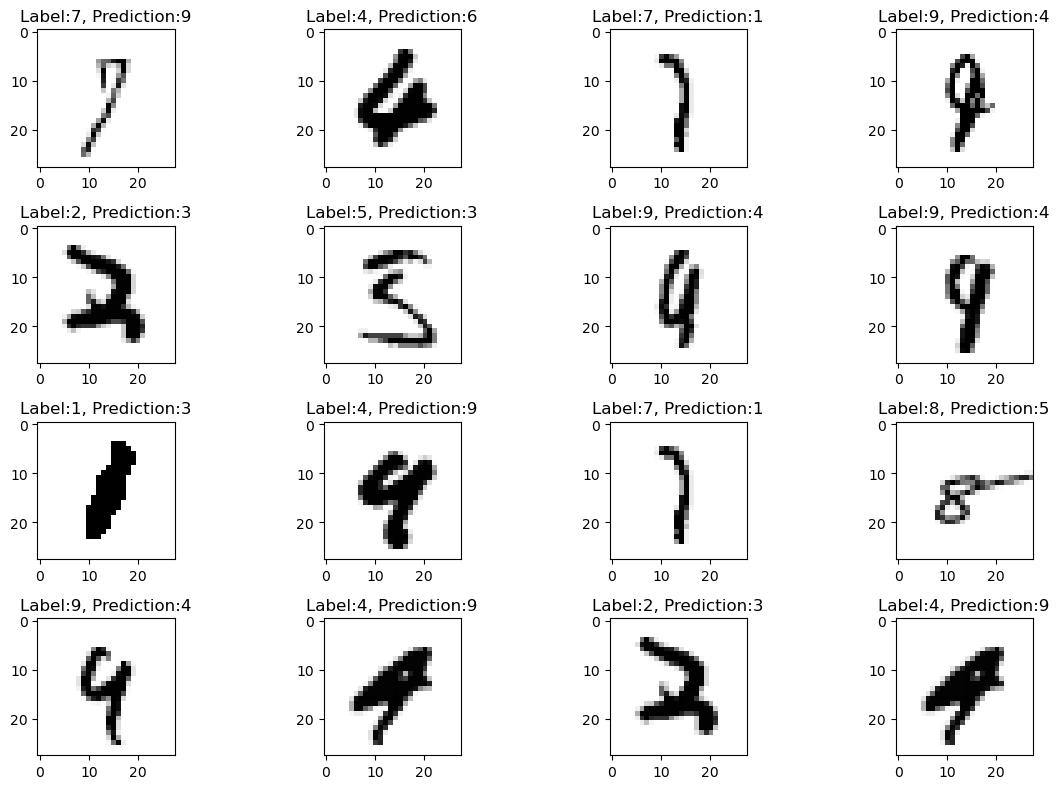

In [11]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(Y_test, axis=1)

wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
samples = random.choices(population=wrong_result, k=16)
count = 0
nrows = ncols = 4
plt.figure(figsize=(12,8))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)
plt.tight_layout()
plt.show() 


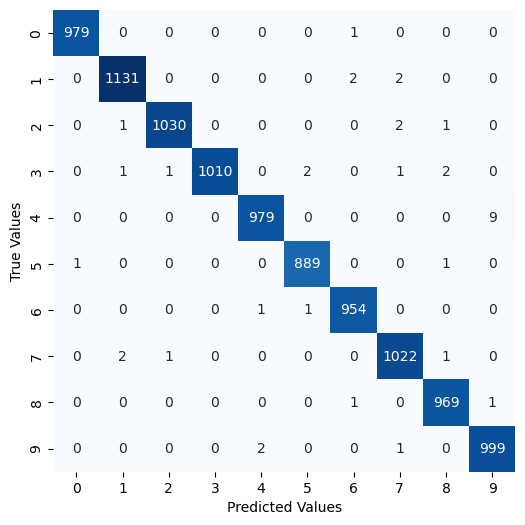

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig = plt.figure(figsize=(6, 6)) # Set Figure

pred= np.argmax(predicted_result, 1) # Decode Predicted labels

mat = confusion_matrix(test_labels, pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();